Finding the Species of Fish. 

In [28]:
#importing the statement
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 


import tensorflow as tf


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data = pd.read_csv('/content/drive/MyDrive/Fish.csv')
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [31]:
data.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [32]:
#preprocesing
len(list(data['Species'].unique()))

7

In [33]:
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])

fish_type = {index: type for index, type in enumerate(encoder.classes_)}
fish_type

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

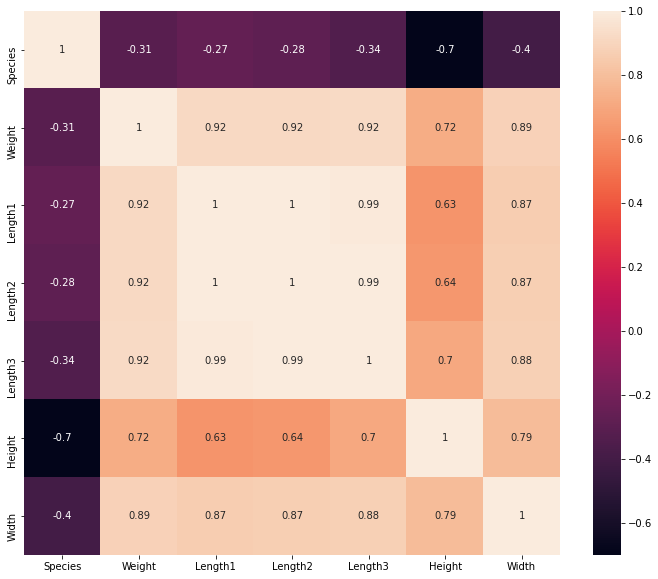

In [34]:
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [35]:
X = data.drop('Species', axis = 1)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
y = data['Species']

In [36]:
# loading the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(111, 6)
(111,)
(48, 6)
(48,)


In [37]:
#creating the model
model = LogisticRegression()
#fitting the data 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuarcy :", model.score(X_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(str(model.score(X_test, y_test) * 100) + "%")

Training accuracy : 0.8648648648648649
Testing accuarcy : 0.625
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.50      0.67         2
           2       0.45      0.93      0.60        14
           3       1.00      0.57      0.73         7
           4       0.00      0.00      0.00        10
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         3

    accuracy                           0.62        48
   macro avg       0.59      0.57      0.54        48
weighted avg       0.53      0.62      0.54        48

[[ 9  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0]
 [ 0  0 13  0  0  1  0]
 [ 0  0  3  4  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  3  0  0  0  0]]
62.5%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
y_pred = model.predict(X_test)
print(y_pred)

[5 0 2 2 5 2 2 0 2 2 2 2 0 0 2 2 0 5 2 3 3 2 0 3 0 1 2 2 0 2 2 2 5 2 2 2 2
 2 2 0 2 3 2 2 2 2 0 2]


In [39]:
#create a pickle file
import pickle
pickle_out = open("LogisticRegresion_FishMarket_model.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()